# Proyecto de Sistema de agrupación de casas

In [1]:
import pandas as pd

# Leer el archivo CSV desde la URL
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Mostrar la información inicial del DataFrame
print(data.describe(include='all'))

# Definir las columnas a eliminar
columns_to_drop = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Eliminar las columnas especificadas
data = data.drop(columns=columns_to_drop)

# Mostrar la información del DataFrame después de la eliminación
print(data.describe(include='all'))


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [ ]:
from sklearn.model_selection import train_test_split

# Usar el DataFrame 'data' como características (X)
X = data.copy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


X_train.head()


,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [3]:
# Guardar el conjunto de entrenamiento en un archivo CSV
X_train.to_csv("../data/processed/data_train.csv", index=False)

# Guardar el conjunto de prueba en un archivo CSV
X_test.to_csv("../data/processed/data_test.csv", index=False)

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Crear el modelo KMeans con 6 clusters y una semilla aleatoria
model = KMeans(n_clusters=6, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train)


KMeans(n_clusters=6, random_state=42)

In [5]:
# Convertir las etiquetas del modelo en una lista
y_train = list(model.labels_)

# Añadir la columna 'cluster' al conjunto de entrenamiento
X_train['cluster'] = y_train

# Mostrar las primeras 20 filas del conjunto de entrenamiento con la nueva columna
X_train.head(20)


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
17848,6.6227,37.42,-121.86,0
6252,2.5192,34.04,-117.97,3
9389,7.9892,37.91,-122.53,0
6113,1.5000,34.13,-117.90,3
6061,6.4266,34.02,-117.79,2


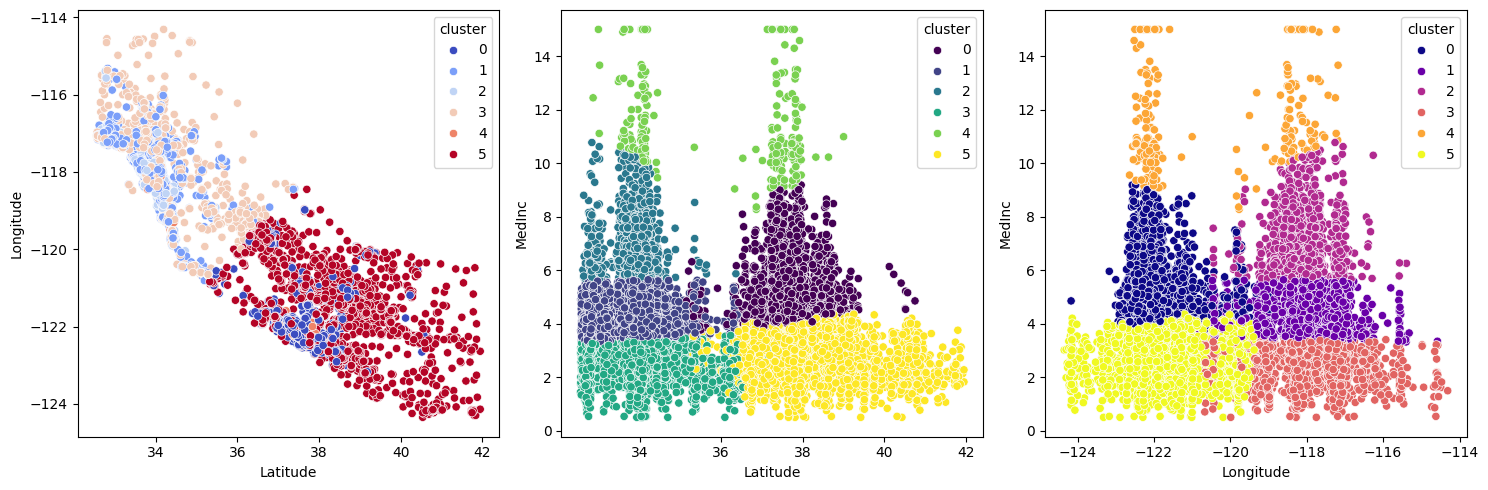

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico 1: Relación entre Latitude y Longitude, coloreado por cluster 
sns.scatterplot(ax=axes[0], data=X_train, x="Latitude", y="Longitude", hue="cluster", palette="coolwarm")

# Gráfico 2: Relación entre Latitude y MedInc, coloreado por cluster 
sns.scatterplot(ax=axes[1], data=X_train, x="Latitude", y="MedInc", hue="cluster", palette="viridis")

# Gráfico 3: Relación entre Longitude y MedInc, coloreado por cluster 
sns.scatterplot(ax=axes[2], data=X_train, x="Longitude", y="MedInc", hue="cluster", palette="plasma")

# Ajuste de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [8]:
# Predecir las etiquetas para el conjunto de prueba
y_test = list(model.predict(X_test))

# Añadir la columna 'cluster' al conjunto de prueba
X_test['cluster'] = y_test

# Mostrar las primeras filas del conjunto de prueba con la nueva columna
X_test.head()


,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


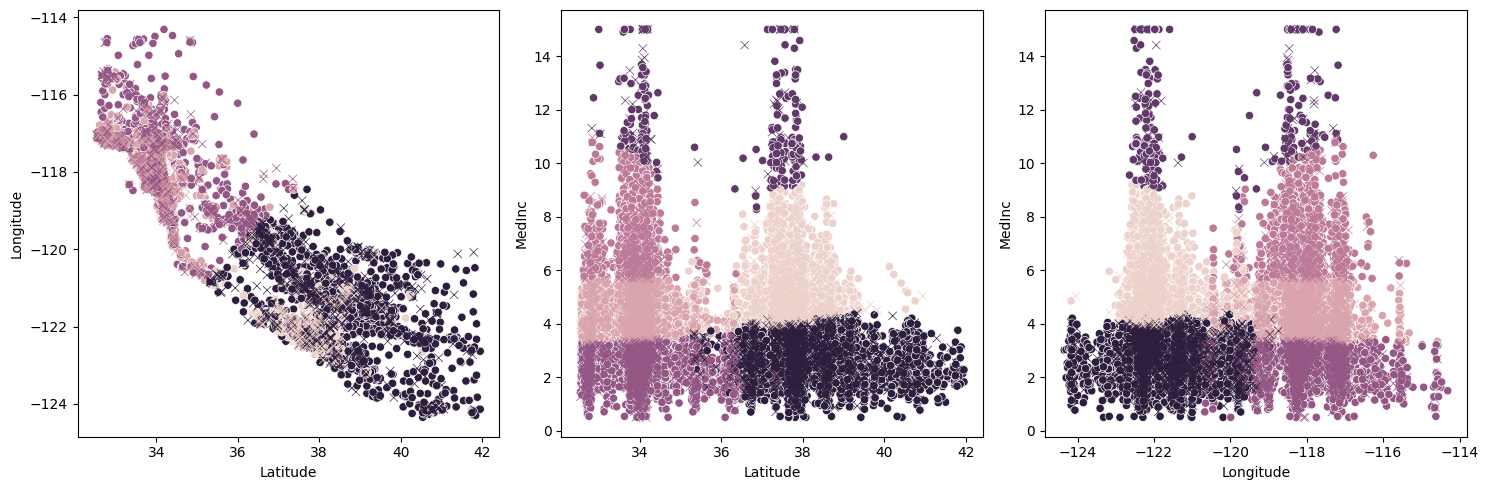

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Dibujar los gráficos para el conjunto de entrenamiento
sns.scatterplot(ax=axes[0], data=X_train, x="Latitude", y="Longitude", hue="cluster")
sns.scatterplot(ax=axes[1], data=X_train, x="Latitude", y="MedInc", hue="cluster")
sns.scatterplot(ax=axes[2], data=X_train, x="Longitude", y="MedInc", hue="cluster")

# Dibujar los gráficos para el conjunto de prueba con un marcador diferente
sns.scatterplot(ax=axes[0], data=X_test, x="Latitude", y="Longitude", hue="cluster", marker="x")
sns.scatterplot(ax=axes[1], data=X_test, x="Latitude", y="MedInc", hue="cluster", marker="x")
sns.scatterplot(ax=axes[2], data=X_test, x="Longitude", y="MedInc", hue="cluster", marker="x")

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Eliminar las leyendas para todos los gráficos
for ax in axes:
    ax.legend([], [], frameon=False)


plt.show()



In [15]:
from xgboost import XGBClassifier

# Seleccionar las características y las etiquetas para el conjunto de entrenamiento
X_train_s = X_train[['MedInc', 'Latitude', 'Longitude']]
y_train_s = X_train['cluster']

# Seleccionar las características y las etiquetas para el conjunto de prueba
X_test_s = X_test[['MedInc', 'Latitude', 'Longitude']]
y_test_s = X_test['cluster']

# Crear el modelo XGBClassifier con una semilla aleatoria
modelXGB = XGBClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelXGB.fit(X_train_s, y_train_s)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [19]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelXGB.predict(X_test_s)

# Visualizar las predicciones generadas por el modelo
print(list(y_pred))


[np.int64(3), np.int64(3), np.int64(5), np.int64(2), np.int64(5), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(2), np.int64(5), np.int64(3), np.int64(3), np.int64(3), np.int64(1), np.int64(1), np.int64(5), np.int64(0), np.int64(1), np.int64(5), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(5), np.int64(3), np.int64(5), np.int64(5), np.int64(2), np.int64(5), np.int64(3), np.int64(1), np.int64(0), np.int64(5), np.int64(1), np.int64(0), np.int64(1), np.int64(5), np.int64(3), np.int64(2), np.int64(5), np.int64(5), np.int64(1), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(3), np.int64(5), np.int64(0), np.int64(3), np.int64(1), np.int64(5), np.int64(3), np.int64(0), np.int64(3), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(3), np.int64(5), np.int64(5), np.int64(2), np.int64(1), np.int64(5), np.int64(0), np.int64(3), np.int64(3), np.int64(5), np.int64(0), np.int64(5), np.int64(1), np.int64(1), np.int64(5), np.int64(0)

In [20]:
X_test

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5
...,...,...,...,...
15362,4.6050,33.36,-117.22,1
16623,2.7266,35.36,-120.83,5
18086,9.2298,37.31,-122.05,4
2144,2.7850,36.77,-119.76,5


In [21]:
from sklearn.metrics import accuracy_score

# Calcular y mostrar la precisión del modelo
score = accuracy_score(y_test_s, y_pred)
print(f"Accuracy: {score:.4f}")


Accuracy: 0.9942


Indica que el modelo XGBoost logró clasificar correctamente el 99.42% de los datos del conjunto de prueba, lo cual representa un desempeño excepcionalmente alto.

In [23]:
from pickle import dump

# Guardar el modelo KMeans en un archivo
with open("../models/kmeans.sav", "wb") as k_file:
    dump(model, k_file)

# Guardar el modelo XGBoost en un archivo
with open("../models/xgb.sav", "wb") as xgb_file:
    dump(modelXGB, xgb_file)
